In [1]:
# core imports
from datetime import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
# gym
import gym
import gym_anytrading

#stable baselines
from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv


# flask
from flask import Flask, render_template, url_for, session, redirect, jsonify, render_template_string, request

# Aplhavantage
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/kenji/miniconda3/envs/tf-1.15/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
ticker = 'F'
#@application.route('/', methods=["POST","GET"])
def index(ticker):
    API_key = 'CSMN0LYTQ5UYMVUT'
    API_URL = "https://www.alphavantage.co/query"
    
    
    ts = TimeSeries(key=API_key, output_format='pandas')
    
    price = ts.get_daily_adjusted(ticker, outputsize='full')[0].transpose()
    price.rename(index={'1. open':'Open', '2. high':'High', '3. low':'Low', '4. close':'Close', '5. adjusted close':'Adjusted Close', '6. volume':'Volume', '7. dividend amount':'Dividend Amount', '8. split coefficient':'Split Coefficient'}, inplace=True)
    price = price.transpose()
    
    
    request = TechIndicators(key=API_key, output_format='pandas')
    
    macd, meta_data = request.get_macd(symbol=ticker,interval='daily')
    bbands, meta_data = request.get_bbands(symbol=ticker,interval='daily')
    rsi,meta_data = request.get_rsi(symbol=ticker,interval='daily',time_period=15)
    sma5, meta_data = request.get_sma(symbol=ticker,time_period=5)
    sma15, meta_data = request.get_sma(symbol=ticker,time_period=15)
    roc, meta_data = request.get_roc(symbol=ticker,series_type='high',interval='daily')
    
    data = pd.concat([price, macd, bbands, rsi, sma5, sma15, roc], axis=1)
    data['crossover'] = data['MACD'] > data['MACD_Signal']
    data = data.dropna()
    return data
    
    

In [3]:
index(ticker)

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,MACD,MACD_Signal,MACD_Hist,Real Upper Band,Real Lower Band,Real Middle Band,RSI,SMA,SMA,ROC,crossover
date,,,,,,,,,,,,,,,,,,,
1999-12-17,49.63,50.44,49.13,50.06,21.269063,6212731.0,0.0,1.0,-0.4938,-0.5657,0.0719,22.2524,20.5683,21.4103,42.5718,20.9521,21.3577,-5.0631,True
1999-12-20,49.81,50.94,49.81,50.50,21.456006,3592489.0,0.0,1.0,-0.4369,-0.5399,0.1030,22.2538,20.5694,21.4116,45.3095,21.0898,21.3348,0.1179,True
1999-12-21,50.50,50.81,50.50,50.75,21.562224,2313558.0,0.0,1.0,-0.3789,-0.5077,0.1288,22.2560,20.5698,21.4129,46.8519,21.2810,21.3419,-1.1094,True
1999-12-22,50.94,51.56,50.50,51.00,21.668442,3134882.0,0.0,1.0,-0.3206,-0.4703,0.1497,22.2738,20.5732,21.4235,48.4108,21.4135,21.3523,0.9792,True
1999-12-23,51.38,53.00,51.19,52.81,22.437459,2838129.0,0.0,1.0,-0.2100,-0.4182,0.2082,22.3877,20.5124,21.4501,57.9729,21.6786,21.4178,2.1588,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,12.32,12.36,12.19,12.23,12.230000,33132872.0,0.0,1.0,0.0237,0.0905,-0.0669,12.9184,11.9156,12.4170,48.3446,12.2580,12.3993,-4.9962,False
2021-04-19,12.22,12.25,12.02,12.11,12.110000,39063481.0,0.0,1.0,0.0013,0.0727,-0.0714,12.8616,11.9004,12.3810,46.1774,12.2040,12.3867,-5.4054,False
2021-04-20,12.06,12.06,11.35,11.45,11.450000,83170803.0,0.0,1.0,-0.0688,0.0444,-0.1132,12.8947,11.7273,12.3110,36.5277,12.0540,12.3400,-6.7285,False


In [4]:
# @app.route('/', methods=('POST', 'GET'))
def ti_sig_feats(ticker):
    db = {}
    data = index(ticker)
    data = data.dropna()

    data['crossover'] = data['MACD'] > data['MACD_Signal']
    data=data[::-1]
    data=data.dropna()
    data=data[4:-4]
    data = pd.DataFrame([data][0])

    return data

In [5]:
z = ti_sig_feats(ticker)

In [6]:
env = gym.make('stocks-v0', df=ti_sig_feats(ticker), frame_bound=(5,200), window_size=5)

In [7]:


env.signal_features



array([[ 1.223e+01,  0.000e+00],
       [ 1.224e+01,  1.000e-02],
       [ 1.224e+01,  0.000e+00],
       [ 1.220e+01, -4.000e-02],
       [ 1.238e+01,  1.800e-01],
       [ 1.251e+01,  1.300e-01],
       [ 1.251e+01,  0.000e+00],
       [ 1.273e+01,  2.200e-01],
       [ 1.292e+01,  1.900e-01],
       [ 1.270e+01, -2.200e-01],
       [ 1.217e+01, -5.300e-01],
       [ 1.225e+01,  8.000e-02],
       [ 1.246e+01,  2.100e-01],
       [ 1.215e+01, -3.100e-01],
       [ 1.230e+01,  1.500e-01],
       [ 1.232e+01,  2.000e-02],
       [ 1.214e+01, -1.800e-01],
       [ 1.221e+01,  7.000e-02],
       [ 1.285e+01,  6.400e-01],
       [ 1.283e+01, -2.000e-02],
       [ 1.249e+01, -3.400e-01],
       [ 1.269e+01,  2.000e-01],
       [ 1.249e+01, -2.000e-01],
       [ 1.320e+01,  7.100e-01],
       [ 1.337e+01,  1.700e-01],
       [ 1.281e+01, -5.600e-01],
       [ 1.291e+01,  1.000e-01],
       [ 1.257e+01, -3.400e-01],
       [ 1.265e+01,  8.000e-02],
       [ 1.227e+01, -3.800e-01],
       [ 1

In [8]:
env.action_space

Discrete(2)

info {'total_reward': -6.260000000000004, 'total_profit': 0.2349731918175999, 'position': 0}


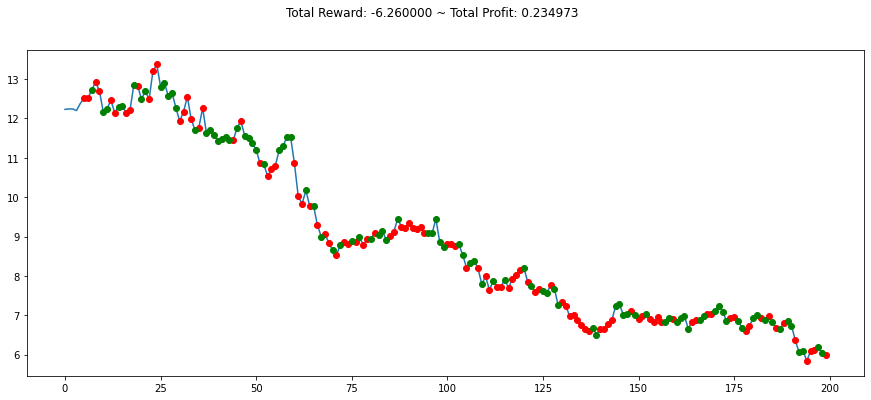

In [9]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [10]:
env_maker = lambda: gym.make('stocks-v0', df=ti_sig_feats(ticker), frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [11]:


model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.045    |
| fps                | 14       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.0264   |
---------------------------------
---------------------------------
| explained_variance | -0.00592 |
| fps                | 302      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.154    |
---------------------------------
---------------------------------
| explained_variance | -0.00642 |
| fps                | 331     

In [12]:


env = gym.make('stocks-v0', df=ti_sig_feats(ticker), frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break



info {'total_reward': 0.0, 'total_profit': 0.8331747557003256, 'position': 1}


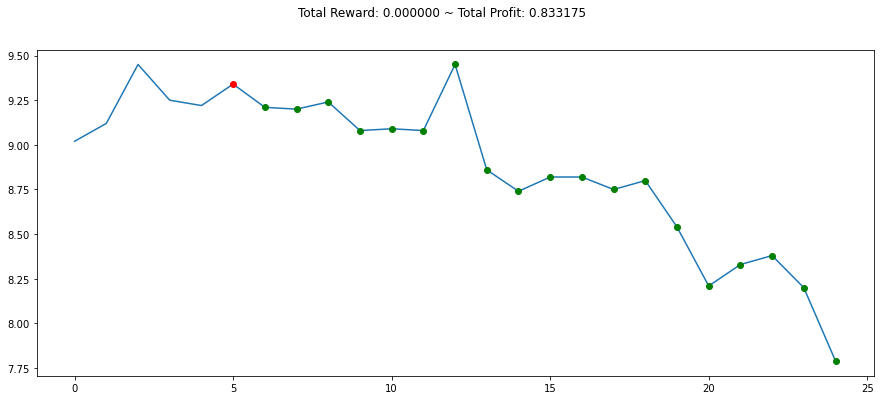

In [13]:


plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

